In [4]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from keras.optimizers import Adam, SGD
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
import itertools
import random
import warnings
import numpy as np
import cv2
# import scipy
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint, EarlyStopping
warnings.simplefilter(action='ignore', category=FutureWarning)


train_path = r'C:\Users\koryz\OneDrive\Desktop\code\signs\train'
test_path = r'C:\Users\koryz\OneDrive\Desktop\code\signs\test'

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(64,64), class_mode='categorical', batch_size=10, shuffle=True)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(64,64), class_mode='categorical', batch_size=10, shuffle=True)

Found 1732 images belonging to 10 classes.
Found 330 images belonging to 10 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

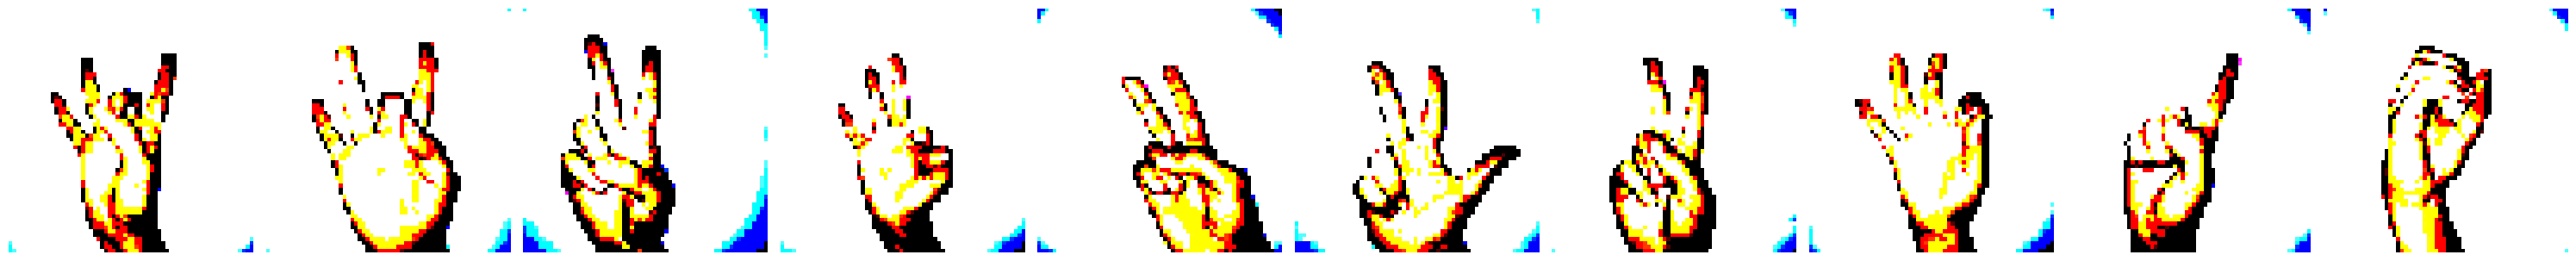

(10, 64, 64, 3)
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [5]:
imgs, labels = next(train_batches)
import scipy
import matplotlib.pyplot as plt

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(30,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


plotImages(imgs)
print(imgs.shape)
print(labels)

In [6]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))
model.add(Dropout(0.2))
model.add(Dense(128,activation ="relu"))
model.add(Dropout(0.3))
model.add(Dense(10,activation ="softmax"))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)        0

In [15]:
model.compile(optimizer=SGD(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0005)

In [16]:
history = model.fit(train_batches, epochs=10, callbacks=[reduce_lr, early_stop],  validation_data = test_batches)

Epoch 1/10
174/174 [==============================] - 9s 46ms/step - loss: 0.6276 - accuracy: 0.8251 - val_loss: 0.9394 - val_accuracy: 0.7061 - lr: 0.0010
Epoch 2/10
174/174 [==============================] - 8s 46ms/step - loss: 0.6002 - accuracy: 0.8441 - val_loss: 0.8141 - val_accuracy: 0.7545 - lr: 0.0010
Epoch 3/10
174/174 [==============================] - 8s 46ms/step - loss: 0.5471 - accuracy: 0.8603 - val_loss: 0.7654 - val_accuracy: 0.7727 - lr: 0.0010
Epoch 4/10
174/174 [==============================] - 8s 46ms/step - loss: 0.5098 - accuracy: 0.8724 - val_loss: 0.7525 - val_accuracy: 0.7727 - lr: 0.0010
Epoch 5/10
174/174 [==============================] - 8s 46ms/step - loss: 0.4698 - accuracy: 0.8868 - val_loss: 0.7840 - val_accuracy: 0.7848 - lr: 0.0010
Epoch 6/10
174/174 [==============================] - 8s 46ms/step - loss: 0.4102 - accuracy: 0.9042 - val_loss: 0.7082 - val_accuracy: 0.8091 - lr: 5.0000e-04
Epoch 7/10
174/174 [==============================] - 8s 47m

In [17]:
imgs, labels = next(test_batches)

In [18]:
scores = model.evaluate(imgs, labels, verbose=0)
print(f'{model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')


loss of 0.35677629709243774; accuracy of 100.0%


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

predictions on a small set of test data--

Five   Six   Two   Eight   Six   Six   Seven   Nine   Six   One   

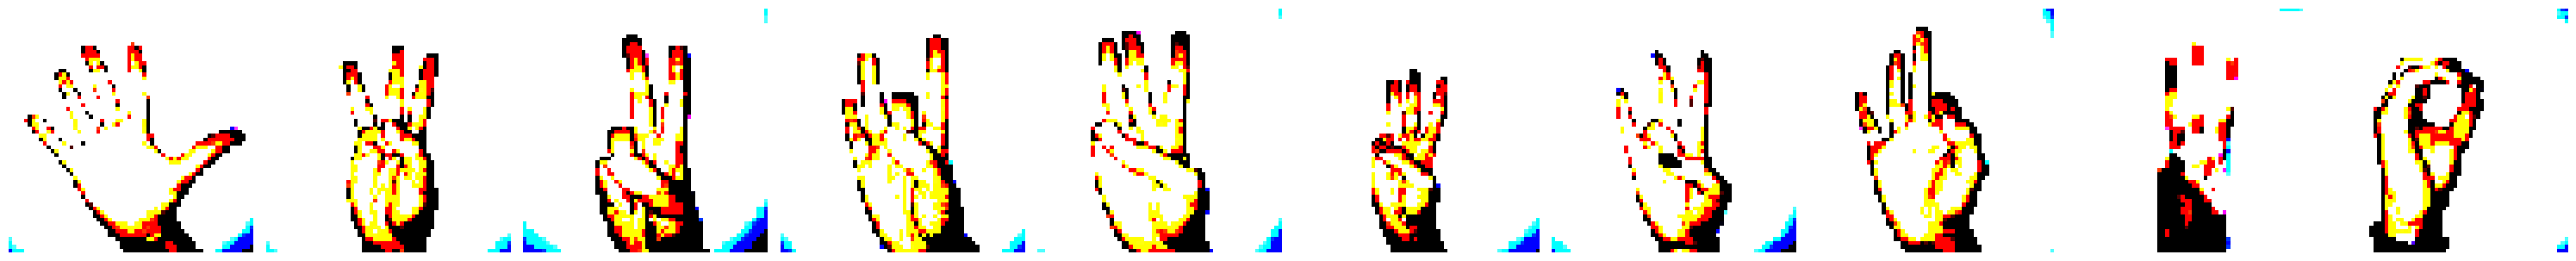

Actual labels
Five   Six   Two   Eight   Six   Six   Seven   Nine   Six   One   (10, 64, 64, 3)


In [19]:
word_dict = {0:'One',1:'Ten',2:'Two',3:'Three',4:'Four',5:'Five',6:'Six',7:'Seven',8:'Eight',9:'Nine'}

predictions = model.predict(imgs, verbose=0)
print("predictions on a small set of test data--")
print("")
for ind, i in enumerate(predictions):
    print(word_dict[np.argmax(i)], end='   ')

plotImages(imgs)
print('Actual labels')
for i in labels:
    print(word_dict[np.argmax(i)], end='   ')

print(imgs.shape)

In [20]:
history.history

{'loss': [0.6275703310966492,
  0.6002417802810669,
  0.5470727682113647,
  0.509838342666626,
  0.4698154628276825,
  0.4101625084877014,
  0.3869265615940094,
  0.37380126118659973,
  0.36001354455947876,
  0.338171124458313],
 'accuracy': [0.8250577449798584,
  0.8441108465194702,
  0.8602771162986755,
  0.8724018335342407,
  0.886836051940918,
  0.9041570425033569,
  0.9116628170013428,
  0.9099307060241699,
  0.9312933087348938,
  0.9289838075637817],
 'val_loss': [0.9393541812896729,
  0.8140527009963989,
  0.7654085159301758,
  0.7525163888931274,
  0.7839598655700684,
  0.7081763744354248,
  0.7173635959625244,
  0.6819732785224915,
  0.6806301474571228,
  0.6618573665618896],
 'val_accuracy': [0.7060605883598328,
  0.7545454502105713,
  0.7727272510528564,
  0.7727272510528564,
  0.7848485112190247,
  0.8090909123420715,
  0.7757575511932373,
  0.8242424130439758,
  0.8242424130439758,
  0.8303030133247375],
 'lr': [0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.0005,
  0.0005

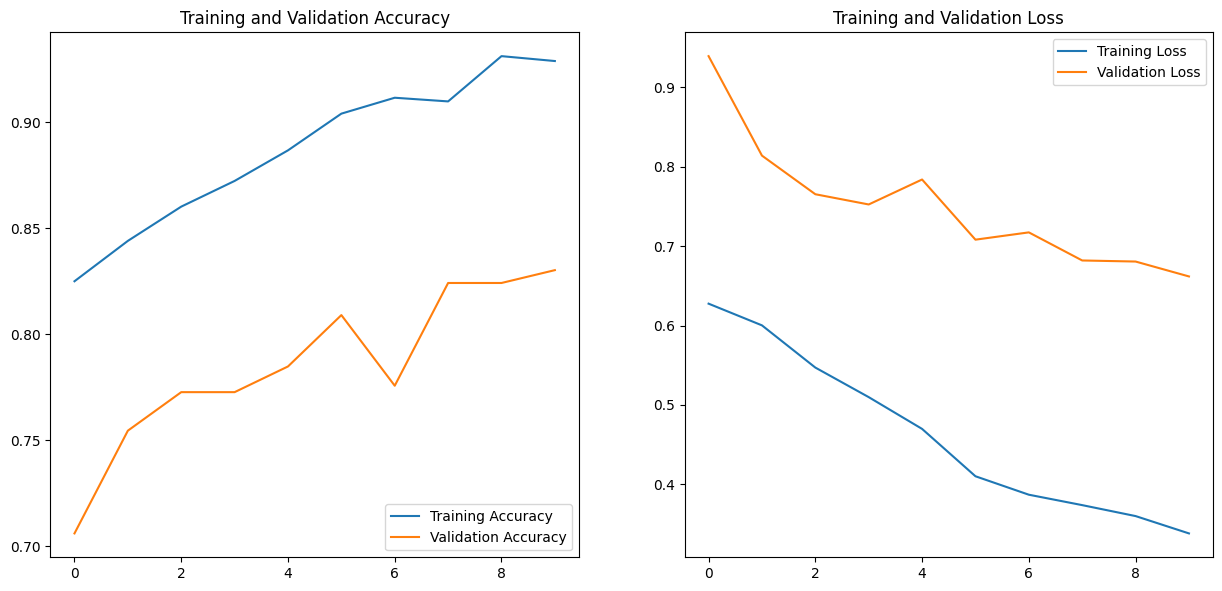

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [22]:
model.save('model_signLang_numbers2.hdf5')